# ARF19 IVA

## Before Running this code, define the following variables: 

In [59]:
#variables:
#primer dilutions:
stkprm = 100 #concentration of the stock primer you are adding
stkvol = 1 #the volume of stock primer you are adding
dilprm = 2.5 #this is the concentration in uM that you want your working dilution to be

#pcr reaction
# need to get this from the df##Numprimers = 4 #this is how many primers go in each pcr reaction.
primerconcentration = 0.1 #this is the concentration you want each primer to be in the pcr reaction
pcrvol = 25 #this is the total volume of your pcr reaction 
templatengs = .5 #this is the concentration of template you want in your pcr rxn in ng/uL

#template dilutions tells you what the temps need to be diluted to initially so that you can just add 1 uL of template to the pcr:
#need to fill in stock template values further down the script
diltemp = (templatengs)*(pcrvol)/1

Q5 = 12.5 #How much Q5 to add
DPNI = 1 #How much DPNI to add




In [60]:
!pip install pyarrow

In [61]:
#first import information from the j5 spreadsheet in order to perform appropriate steps
#import feather
import pyarrow.feather as ft
import pandas as pd
import numpy as np

## Import oligo.feather

In [62]:
#path for my imac
#path = '/Users/jbryant2/Google Drive File Stream/Shared drives/PlantSynBioLab/Cloning/AFB_epistasis_muts/oligo.feather'
#note: mac doesn't like to have "C:/" in it's paths

#path for my windows machine
path = 'C:/Users/jonbr/Documents/GitHub/opentrons/IVA/ARF_Deletions/ARF19/oligo.feather'

oligos = ft.read_feather(path)
oligos

oligos['ID Number'] = oligos['ID Number'].astype(int)
oligos

,ID Number,Name,Length,Tm,Tm (3' only),Cost,Sequence,Sequence (3' only)
0,0,mas00001_(ARF19_0-010)_forward,28.0,64.017,53.368,2.8,GGCTTCAAAATGAAAGCTCCATCAAATG,ATGAAAGCTCCATCAAATG
1,1,mas00002_(ARF19_0-010)_reverse,20.0,52.026,52.026,2.0,AGGACATATGTAAAAAGGAG,AGGACATATGTAAAAAGGAG
2,2,mas00003_(ARF19_051-end)_forward,41.0,71.427,65.560,4.1,CCTTTTTACATATGTCCTGCACAGAGTTCGATGTTCCCTGG,GCACAGAGTTCGATGTTCCCTGG
3,3,mas00004_(ARF19_051-end)_reverse,32.0,72.382,62.331,3.2,GCTGGGTGCTATCTGTTGAAAGAAGCTGCAGC,CTATCTGTTGAAAGAAGCTGCAGC
4,4,mas00005_(Backbone_ARF19del)_forward,33.0,69.660,64.299,3.3,ACAGATAGCACCCAGCTTTCTTGTACAAAGTGG,CACCCAGCTTTCTTGTACAAAGTGG
5,5,mas00006_(Backbone_ARF19del)_reverse,43.0,68.528,68.419,4.3,GCTTTCATTTTGAAGCCTGCTTTTTTGTACAAACTTGTGATGG,TTTGAAGCCTGCTTTTTTGTACAAACTTGTGATGG
6,6,mas00007_(ARF19_0-200)_reverse,21.0,57.312,57.312,2.1,CTGAGAGAATCCAGTAGGTTG,CTGAGAGAATCCAGTAGGTTG
7,7,mas00008_(ARF19_241-end)_forward,36.0,72.527,60.226,3.6,CTACTGGATTCTCTCAGCAGCAGCAACTGGAAATGC,CAGCAGCAACTGGAAATGC


In [63]:
if len(oligos.columns) < 9:
    oligos['well'] = ''
    oligos['stock primer concentration'] = ''
    oligos['volume of stock primer to add'] = ''
    oligos['concentration of diluted primer'] = ''
    oligos['volume of diluted primer'] = '' #this is a calculated value
    oligos['how much of the diluted primer is left'] = '' #also a calculated value
oligos

,ID Number,Name,Length,Tm,Tm (3' only),Cost,Sequence,Sequence (3' only),well,stock primer concentration,volume of stock primer to add,concentration of diluted primer,volume of diluted primer,how much of the diluted primer is left
0,0,mas00001_(ARF19_0-010)_forward,28.0,64.017,53.368,2.8,GGCTTCAAAATGAAAGCTCCATCAAATG,ATGAAAGCTCCATCAAATG,,,,,,
1,1,mas00002_(ARF19_0-010)_reverse,20.0,52.026,52.026,2.0,AGGACATATGTAAAAAGGAG,AGGACATATGTAAAAAGGAG,,,,,,
2,2,mas00003_(ARF19_051-end)_forward,41.0,71.427,65.560,4.1,CCTTTTTACATATGTCCTGCACAGAGTTCGATGTTCCCTGG,GCACAGAGTTCGATGTTCCCTGG,,,,,,
3,3,mas00004_(ARF19_051-end)_reverse,32.0,72.382,62.331,3.2,GCTGGGTGCTATCTGTTGAAAGAAGCTGCAGC,CTATCTGTTGAAAGAAGCTGCAGC,,,,,,
4,4,mas00005_(Backbone_ARF19del)_forward,33.0,69.660,64.299,3.3,ACAGATAGCACCCAGCTTTCTTGTACAAAGTGG,CACCCAGCTTTCTTGTACAAAGTGG,,,,,,
5,5,mas00006_(Backbone_ARF19del)_reverse,43.0,68.528,68.419,4.3,GCTTTCATTTTGAAGCCTGCTTTTTTGTACAAACTTGTGATGG,TTTGAAGCCTGCTTTTTTGTACAAACTTGTGATGG,,,,,,
6,6,mas00007_(ARF19_0-200)_reverse,21.0,57.312,57.312,2.1,CTGAGAGAATCCAGTAGGTTG,CTGAGAGAATCCAGTAGGTTG,,,,,,
7,7,mas00008_(ARF19_241-end)_forward,36.0,72.527,60.226,3.6,CTACTGGATTCTCTCAGCAGCAGCAACTGGAAATGC,CAGCAGCAACTGGAAATGC,,,,,,


In [64]:
#custom 4x6 well plate dictionary. hardcoded specifically for the labware used. 
#this could easily be replace with another well specification dictionary

id2well = {}
id2well['0'] = 'A1'
id2well['1'] = 'A2'
id2well['2'] = 'A3'
id2well['3'] = 'A4'
id2well['4'] = 'A5'
id2well['5'] = 'A6'
id2well['6'] = 'B1'
id2well['7'] = 'B2'
id2well['8'] = 'B3'
id2well['9'] = 'B4'
id2well['10'] = 'B5'
id2well['11'] = 'B6'
id2well['12'] = 'C1'
id2well['13'] = 'C2'
id2well['14'] = 'C3'
id2well['15'] = 'C4'
id2well['16'] = 'C5'
id2well['17'] = 'C6'
id2well['18'] = 'D1'
id2well['19'] = 'D2'
id2well['20'] = 'D3'
id2well['21'] = 'D4'
id2well['22'] = 'D5'
id2well['23'] = 'D6'

In [65]:
for i, row in oligos.iterrows():
    oligos.loc[i,'well'] = id2well[str(i)] #this only works because the index matces the id number. id number is a floating value
    oligos.loc[i,'stock primer concentration'] = stkprm
    oligos.loc[i,'volume of stock primer to add'] = stkvol
    oligos.loc[i,'concentration of diluted primer'] = dilprm
    
for i, row in oligos.iterrows():
    oligos.loc[i,'volume of diluted primer'] = row['stock primer concentration']*row['volume of stock primer to add']/row['concentration of diluted primer']
    
oligos

,ID Number,Name,Length,Tm,Tm (3' only),Cost,Sequence,Sequence (3' only),well,stock primer concentration,volume of stock primer to add,concentration of diluted primer,volume of diluted primer,how much of the diluted primer is left
0,0,mas00001_(ARF19_0-010)_forward,28.0,64.017,53.368,2.8,GGCTTCAAAATGAAAGCTCCATCAAATG,ATGAAAGCTCCATCAAATG,A1,100,1,2.5,40.0,
1,1,mas00002_(ARF19_0-010)_reverse,20.0,52.026,52.026,2.0,AGGACATATGTAAAAAGGAG,AGGACATATGTAAAAAGGAG,A2,100,1,2.5,40.0,
2,2,mas00003_(ARF19_051-end)_forward,41.0,71.427,65.560,4.1,CCTTTTTACATATGTCCTGCACAGAGTTCGATGTTCCCTGG,GCACAGAGTTCGATGTTCCCTGG,A3,100,1,2.5,40.0,
3,3,mas00004_(ARF19_051-end)_reverse,32.0,72.382,62.331,3.2,GCTGGGTGCTATCTGTTGAAAGAAGCTGCAGC,CTATCTGTTGAAAGAAGCTGCAGC,A4,100,1,2.5,40.0,
4,4,mas00005_(Backbone_ARF19del)_forward,33.0,69.660,64.299,3.3,ACAGATAGCACCCAGCTTTCTTGTACAAAGTGG,CACCCAGCTTTCTTGTACAAAGTGG,A5,100,1,2.5,40.0,
5,5,mas00006_(Backbone_ARF19del)_reverse,43.0,68.528,68.419,4.3,GCTTTCATTTTGAAGCCTGCTTTTTTGTACAAACTTGTGATGG,TTTGAAGCCTGCTTTTTTGTACAAACTTGTGATGG,A6,100,1,2.5,40.0,
6,6,mas00007_(ARF19_0-200)_reverse,21.0,57.312,57.312,2.1,CTGAGAGAATCCAGTAGGTTG,CTGAGAGAATCCAGTAGGTTG,B1,100,1,2.5,40.0,
7,7,mas00008_(ARF19_241-end)_forward,36.0,72.527,60.226,3.6,CTACTGGATTCTCTCAGCAGCAGCAACTGGAAATGC,CAGCAGCAACTGGAAATGC,B2,100,1,2.5,40.0,


# Import pcr.feather

In [66]:
#path for my imac
#path = '/Users/jbryant2/Google Drive File Stream/Shared drives/PlantSynBioLab/Cloning/AFB_epistasis_muts/pcr.feather'

#path for my windows machine
path = 'C:/Users/jonbr/Documents/GitHub/opentrons/IVA/ARF_Deletions/ARF19/pcr.feather'

pcr = ft.read_feather(path)
pcr

pcr[['Reaction ID Number','Forward Oligo ID Number','Reverse Oligo ID Number']] = pcr[['Reaction ID Number','Forward Oligo ID Number','Reverse Oligo ID Number']].astype(int)
pcr

,Reaction ID Number,Primary Template,Alternate Template,Forward Oligo ID Number,Forward Oligo Name,Reverse Oligo ID Number,Reverse Oligo Name,Notes,Mean Oligo Tm,Delta Oligo Tm,Mean Oligo Tm (3' Only),Delta Oligo Tm (3'Only),Length,Sequence
0,0,pWL87,None,0,mas00001_(ARF19_0-010)_forward,1,mas00002_(ARF19_0-010)_reverse,PCR,58.0215,11.991,52.6970,1.342,1104.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...
1,1,pWL87,None,2,mas00003_(ARF19_051-end)_forward,3,mas00004_(ARF19_051-end)_reverse,PCR,71.9045,0.955,63.9455,3.229,2072.0,CCTTTTTACATATGTCCTGCACAGAGTTCGATGTTCCCTGGTTTAA...
2,2,pWL87,None,4,mas00005_(Backbone_ARF19del)_forward,5,mas00006_(Backbone_ARF19del)_reverse,PCR,69.0940,1.132,66.3590,4.120,6447.0,ACAGATAGCACCCAGCTTTCTTGTACAAAGTGGTTCTTGTACAAAG...
3,3,pWL87,None,0,mas00001_(ARF19_0-010)_forward,6,mas00007_(ARF19_0-200)_reverse,PCR,60.6645,6.705,55.3400,3.944,1674.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...
4,4,pWL87,None,7,mas00008_(ARF19_241-end)_forward,3,mas00004_(ARF19_051-end)_reverse,PCR,72.4545,0.145,61.2785,2.105,1501.0,CTACTGGATTCTCTCAGCAGCAGCAACTGGAAATGCATAACAGTAG...


from the pcr reactions dataframe object, we need to first figure out which templates are used, have the user input the template concentrations, and then create a new column with template concentrations in this dataframe.

In [67]:
#here we create an object with each unique template from the
templates = pcr["Primary Template"]
unique_templates = templates.drop_duplicates(keep = 'first', inplace = False)
unique_templates


0    pWL87
Name: Primary Template, dtype: object

In [68]:
df = pd.DataFrame(unique_templates)

df = df.reset_index()
df = df.drop('index', 1)

df['Template Concentration'] = ''
df

,Primary Template,Template Concentration
0,pWL87,


The user has to come down here and enter in a vector of the template concentrations **In the correct order of the the unique_templates dataframe** the code will then automatically populate the pcr dataframe with this information

In [69]:
#enter template concentrations here
df['Template Concentration'] = [387] #all you have to do is input the template concentrations in the right order

df

,Primary Template,Template Concentration
0,pWL87,387


In [70]:
startnum = len(oligos['well'])

for i, row in df.iterrows():
    df.loc[i,'template_well'] = id2well[str(startnum+i)]
    


for i, row in df.iterrows():
    df.loc[i,'amount of template to add'] = 1


for i, row in df.iterrows():
   
        df.loc[i,'concentration of template (ng/uL)'] = diltemp

df['volume of dilute template prepared'] = df['Template Concentration']*stkvol/df['concentration of template (ng/uL)']

df['water to add']= df['volume of dilute template prepared']-df['amount of template to add']


#df['volume of dilute template prepared'] = df['volume of dilute template prepared'].astype(float)
#df['concentration of template (ng/uL)'] = df['concentration of template (ng/uL)'].astype(float)
#df['amount of template to add'] = df['amount of template to add'].astype(float)

#df['water to add'] = df['water to add'].astype(int)
#df['concentration of template (ng/uL)'] = df['concentration of template (ng/uL)'].astype(int)
#df['volume of dilute template prepared'] = df['volume of dilute template prepared'].astype(int)
#df['amount of template to add'] = df['amount of template to add'].astype(int)

df['water to add'].astype(np.float32)
df['amount of template to add'].astype(np.float32)
df['concentration of template (ng/uL)'].astype(np.float32)
df['volume of dilute template prepared'].astype(np.float32)

#df['amount of template to add'] = pd.Series.astype(df['amount of template to add'], dtype=float)
#df['concentration of template (ng/uL)'] = pd.Series.astype(df['concentration of template (ng/uL)'], dtype=float)
#df['volume of dilute template prepared'] = pd.Series.astype(df['volume of dilute template prepared'], dtype=float,)
df

,Primary Template,Template Concentration,template_well,amount of template to add,concentration of template (ng/uL),volume of dilute template prepared,water to add
0,pWL87,387,B3,1.0,12.5,30.96,29.96


In [71]:
df.dtypes

Primary Template                       object
Template Concentration                  int64
template_well                          object
amount of template to add             float64
concentration of template (ng/uL)     float64
volume of dilute template prepared    float64
water to add                          float64
dtype: object

In [72]:
#this line of code integrates the template concentrations into the pcr df
pcr_plustemplates = pd.merge(pcr,df,on='Primary Template')
pcr_plustemplates

,Reaction ID Number,Primary Template,Alternate Template,Forward Oligo ID Number,Forward Oligo Name,Reverse Oligo ID Number,Reverse Oligo Name,Notes,Mean Oligo Tm,Delta Oligo Tm,Mean Oligo Tm (3' Only),Delta Oligo Tm (3'Only),Length,Sequence,Template Concentration,template_well,amount of template to add,concentration of template (ng/uL),volume of dilute template prepared,water to add
0,0,pWL87,None,0,mas00001_(ARF19_0-010)_forward,1,mas00002_(ARF19_0-010)_reverse,PCR,58.0215,11.991,52.6970,1.342,1104.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...,387,B3,1.0,12.5,30.96,29.96
1,1,pWL87,None,2,mas00003_(ARF19_051-end)_forward,3,mas00004_(ARF19_051-end)_reverse,PCR,71.9045,0.955,63.9455,3.229,2072.0,CCTTTTTACATATGTCCTGCACAGAGTTCGATGTTCCCTGGTTTAA...,387,B3,1.0,12.5,30.96,29.96
2,2,pWL87,None,4,mas00005_(Backbone_ARF19del)_forward,5,mas00006_(Backbone_ARF19del)_reverse,PCR,69.0940,1.132,66.3590,4.120,6447.0,ACAGATAGCACCCAGCTTTCTTGTACAAAGTGGTTCTTGTACAAAG...,387,B3,1.0,12.5,30.96,29.96
3,3,pWL87,None,0,mas00001_(ARF19_0-010)_forward,6,mas00007_(ARF19_0-200)_reverse,PCR,60.6645,6.705,55.3400,3.944,1674.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...,387,B3,1.0,12.5,30.96,29.96
4,4,pWL87,None,7,mas00008_(ARF19_241-end)_forward,3,mas00004_(ARF19_051-end)_reverse,PCR,72.4545,0.145,61.2785,2.105,1501.0,CTACTGGATTCTCTCAGCAGCAGCAACTGGAAATGCATAACAGTAG...,387,B3,1.0,12.5,30.96,29.96


In [73]:
if len(pcr_plustemplates.columns) == 17:

    for i, row in pcr_plustemplates.iterrows():
   
        pcr_plustemplates.loc[i,'concentration of template (ng/uL)'] = diltemp

pcr_plustemplates['volume of dilute template prepared'] = pcr_plustemplates['Template Concentration']*stkvol/pcr_plustemplates['concentration of template (ng/uL)']

pcr_plustemplates


,Reaction ID Number,Primary Template,Alternate Template,Forward Oligo ID Number,Forward Oligo Name,Reverse Oligo ID Number,Reverse Oligo Name,Notes,Mean Oligo Tm,Delta Oligo Tm,Mean Oligo Tm (3' Only),Delta Oligo Tm (3'Only),Length,Sequence,Template Concentration,template_well,amount of template to add,concentration of template (ng/uL),volume of dilute template prepared,water to add
0,0,pWL87,None,0,mas00001_(ARF19_0-010)_forward,1,mas00002_(ARF19_0-010)_reverse,PCR,58.0215,11.991,52.6970,1.342,1104.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...,387,B3,1.0,12.5,30.96,29.96
1,1,pWL87,None,2,mas00003_(ARF19_051-end)_forward,3,mas00004_(ARF19_051-end)_reverse,PCR,71.9045,0.955,63.9455,3.229,2072.0,CCTTTTTACATATGTCCTGCACAGAGTTCGATGTTCCCTGGTTTAA...,387,B3,1.0,12.5,30.96,29.96
2,2,pWL87,None,4,mas00005_(Backbone_ARF19del)_forward,5,mas00006_(Backbone_ARF19del)_reverse,PCR,69.0940,1.132,66.3590,4.120,6447.0,ACAGATAGCACCCAGCTTTCTTGTACAAAGTGGTTCTTGTACAAAG...,387,B3,1.0,12.5,30.96,29.96
3,3,pWL87,None,0,mas00001_(ARF19_0-010)_forward,6,mas00007_(ARF19_0-200)_reverse,PCR,60.6645,6.705,55.3400,3.944,1674.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...,387,B3,1.0,12.5,30.96,29.96
4,4,pWL87,None,7,mas00008_(ARF19_241-end)_forward,3,mas00004_(ARF19_051-end)_reverse,PCR,72.4545,0.145,61.2785,2.105,1501.0,CTACTGGATTCTCTCAGCAGCAGCAACTGGAAATGCATAACAGTAG...,387,B3,1.0,12.5,30.96,29.96


now i will tack on the wells where the forward and reverse primers are located

In [74]:
wellinfo = oligos[['ID Number','well']]
wellinfo

wellinfo = wellinfo.rename(columns={'ID Number':'Forward Oligo ID Number'})
pcr_plustemplates = pcr_plustemplates.merge(wellinfo, on= 'Forward Oligo ID Number')
wellinfo = wellinfo.rename(columns={'Forward Oligo ID Number':'Reverse Oligo ID Number','well':'well2'})
pcr_plustemplates = pcr_plustemplates.merge(wellinfo, on= 'Reverse Oligo ID Number')
pcr_plustemplates

,Reaction ID Number,Primary Template,Alternate Template,Forward Oligo ID Number,Forward Oligo Name,Reverse Oligo ID Number,Reverse Oligo Name,Notes,Mean Oligo Tm,Delta Oligo Tm,...,Length,Sequence,Template Concentration,template_well,amount of template to add,concentration of template (ng/uL),volume of dilute template prepared,water to add,well,well2
0,0,pWL87,None,0,mas00001_(ARF19_0-010)_forward,1,mas00002_(ARF19_0-010)_reverse,PCR,58.0215,11.991,...,1104.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...,387,B3,1.0,12.5,30.96,29.96,A1,A2
1,3,pWL87,None,0,mas00001_(ARF19_0-010)_forward,6,mas00007_(ARF19_0-200)_reverse,PCR,60.6645,6.705,...,1674.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...,387,B3,1.0,12.5,30.96,29.96,A1,B1
2,1,pWL87,None,2,mas00003_(ARF19_051-end)_forward,3,mas00004_(ARF19_051-end)_reverse,PCR,71.9045,0.955,...,2072.0,CCTTTTTACATATGTCCTGCACAGAGTTCGATGTTCCCTGGTTTAA...,387,B3,1.0,12.5,30.96,29.96,A3,A4
3,4,pWL87,None,7,mas00008_(ARF19_241-end)_forward,3,mas00004_(ARF19_051-end)_reverse,PCR,72.4545,0.145,...,1501.0,CTACTGGATTCTCTCAGCAGCAGCAACTGGAAATGCATAACAGTAG...,387,B3,1.0,12.5,30.96,29.96,B2,A4
4,2,pWL87,None,4,mas00005_(Backbone_ARF19del)_forward,5,mas00006_(Backbone_ARF19del)_reverse,PCR,69.0940,1.132,...,6447.0,ACAGATAGCACCCAGCTTTCTTGTACAAAGTGGTTCTTGTACAAAG...,387,B3,1.0,12.5,30.96,29.96,A5,A6


## Import assembly.feather

In [75]:
#read in assembly pieces as dataframe .... might not need this info

#path for my imac
#path = '/Users/jbryant2/Google Drive File Stream/Shared drives/PlantSynBioLab/Cloning/AFB_epistasis_muts/assembly.feather'

#path for my windows machine
path ='C:/Users/jonbr/Documents/GitHub/opentrons/IVA/ARF_Deletions/ARF19/assembly.feather'
    
assembly = ft.read_feather(path)
assembly

,Reaction ID Number,Reaction Type,Type ID Number,Part(s),Relative Overlap Position,Extra 5' CPEC bps,Extra 3' CPEC bps,CPEC Tm Next,Overlap with next (#bps),Overlap with Next (Sequence),Overlap with Next (Sequence Reverse Compliment),Sequence Length,Sequence
0,0,PCR,0,(ARF19_0-010),-8,2,0,48.314,18,CCTTTTTACATATGTCCT,AGGACATATGTAAAAAGG,1104.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...
1,1,PCR,1,(ARF19_051-end),0,0,0,55.188,16,ACAGATAGCACCCAGC,GCTGGGTGCTATCTGT,2072.0,CCTTTTTACATATGTCCTGCACAGAGTTCGATGTTCCCTGGTTTAA...
2,2,PCR,2,(Backbone_ARF19del),0,1,0,51.661,17,GGCTTCAAAATGAAAGC,GCTTTCATTTTGAAGCC,6447.0,ACAGATAGCACCCAGCTTTCTTGTACAAAGTGGTTCTTGTACAAAG...
3,3,PCR,3,(ARF19_0-200),-8,1,0,49.446,17,CTACTGGATTCTCTCAG,CTGAGAGAATCCAGTAG,1674.0,GGCTTCAAAATGAAAGCTCCATCAAATGGATTTCTTCCAAGTTCCA...
4,4,PCR,4,(ARF19_241-end),0,0,0,55.188,16,ACAGATAGCACCCAGC,GCTGGGTGCTATCTGT,1501.0,CTACTGGATTCTCTCAGCAGCAGCAACTGGAAATGCATAACAGTAG...


## Import combinations.feather

In [76]:
#path for my imac
#path = '/Users/jbryant2/Google Drive File Stream/Shared drives/PlantSynBioLab/Cloning/AFB_epistasis_muts/combinations.feather'

#path for my windows machine
path = 'C:/Users/jonbr/Documents/GitHub/opentrons/IVA/ARF_Deletions/ARF19/combinations.feather'

combinations = ft.read_feather(path)
combinations

combinations[['ID Number','Assembly Piece ID Number Bin 0','Assembly Piece ID Number Bin 1','Assembly Piece ID Number Bin 2']] = combinations[['ID Number','Assembly Piece ID Number Bin 0','Assembly Piece ID Number Bin 1','Assembly Piece ID Number Bin 2']].astype(int)
combinations

,ID Number,Name,Assembly Method,Part(s) Bin 0,Assembly Piece ID Number Bin 0,Part(s) Bin 1,Assembly Piece ID Number Bin 1,Part(s) Bin 2,Assembly Piece ID Number Bin 2
0,0,pmas00001,SLIC/Gibson/CPEC,(ARF19_0-010),0,(ARF19_051-end),1,(Backbone_ARF19del),2
1,1,pmas00002,SLIC/Gibson/CPEC,(ARF19_0-200),3,(ARF19_241-end),4,(Backbone_ARF19del),2


In [77]:
primerlocations = pcr_plustemplates[['Reaction ID Number','well','well2']]
primerlocations

primerlocations = primerlocations.rename(columns={'Reaction ID Number':'Assembly Piece ID Number Bin 0'})
combinations = combinations.merge(primerlocations, on= 'Assembly Piece ID Number Bin 0')

primerlocations = primerlocations.rename(columns={'Assembly Piece ID Number Bin 0':'Assembly Piece ID Number Bin 1'})
combinations = combinations.merge(primerlocations, on= 'Assembly Piece ID Number Bin 1')

primerlocations = primerlocations.rename(columns={'Assembly Piece ID Number Bin 1':'Assembly Piece ID Number Bin 2'})
combinations = combinations.merge(primerlocations, on= 'Assembly Piece ID Number Bin 2')



combinations['primer concentrations'] = oligos['concentration of diluted primer']
combinations['amount primer to add to IVA'] = pcrvol*primerconcentration/combinations['primer concentrations']

templateinformation = pcr_plustemplates[['Reaction ID Number','template_well']]

templateinformation = templateinformation.rename(columns={'Reaction ID Number':'Assembly Piece ID Number Bin 0'})
combinations = combinations.merge(templateinformation, on= 'Assembly Piece ID Number Bin 0')

templateinformation = templateinformation.rename(columns={'Assembly Piece ID Number Bin 0':'Assembly Piece ID Number Bin 1'})
combinations = combinations.merge(templateinformation, on= 'Assembly Piece ID Number Bin 1')

templateinformation = templateinformation.rename(columns={'Assembly Piece ID Number Bin 1':'Assembly Piece ID Number Bin 2'})
combinations = combinations.merge(templateinformation, on= 'Assembly Piece ID Number Bin 2')

combinations['template concentrations'] = pcr_plustemplates['concentration of template (ng/uL)']
combinations['amount templates to add'] = pcrvol*templatengs/combinations['template concentrations']


filter_col = [col for col in combinations if col.startswith('well')] #here we calculate how much water to add
filter_col
primersadded = len(filter_col)

temp_col = [col for col in combinations if col.startswith('template_')] #here we calculate how much water to add
temp_col
tempsadded = len(temp_col)


combinations['water to add'] = (pcrvol-primersadded- tempsadded - Q5)


combinations

,ID Number,Name,Assembly Method,Part(s) Bin 0,Assembly Piece ID Number Bin 0,Part(s) Bin 1,Assembly Piece ID Number Bin 1,Part(s) Bin 2,Assembly Piece ID Number Bin 2,well_x,...,well,well2,primer concentrations,amount primer to add to IVA,template_well_x,template_well_y,template_well,template concentrations,amount templates to add,water to add
0,0,pmas00001,SLIC/Gibson/CPEC,(ARF19_0-010),0,(ARF19_051-end),1,(Backbone_ARF19del),2,A1,...,A5,A6,2.5,1.0,B3,B3,B3,12.5,1.0,3.5
1,1,pmas00002,SLIC/Gibson/CPEC,(ARF19_0-200),3,(ARF19_241-end),4,(Backbone_ARF19del),2,A1,...,A5,A6,2.5,1.0,B3,B3,B3,12.5,1.0,3.5


In [78]:
id2wellpcr = {}
id2wellpcr['0'] = 'A1'
id2wellpcr['1'] = 'A2'
id2wellpcr['2'] = 'A3'
id2wellpcr['3'] = 'A4'
id2wellpcr['4'] = 'A5'
id2wellpcr['5'] = 'A6'
id2wellpcr['6'] = 'A7'
id2wellpcr['7'] = 'A8'
id2wellpcr['8'] = 'A9'
id2wellpcr['9'] = 'A10'
id2wellpcr['10'] = 'A11'
id2wellpcr['11'] = 'A12'

In [79]:
combinations['pcrwell']=combinations['ID Number']
for i, row in combinations.iterrows():
    combinations.loc[i,'pcrwell'] = id2wellpcr[str(i)]
combinations

,ID Number,Name,Assembly Method,Part(s) Bin 0,Assembly Piece ID Number Bin 0,Part(s) Bin 1,Assembly Piece ID Number Bin 1,Part(s) Bin 2,Assembly Piece ID Number Bin 2,well_x,...,well2,primer concentrations,amount primer to add to IVA,template_well_x,template_well_y,template_well,template concentrations,amount templates to add,water to add,pcrwell
0,0,pmas00001,SLIC/Gibson/CPEC,(ARF19_0-010),0,(ARF19_051-end),1,(Backbone_ARF19del),2,A1,...,A6,2.5,1.0,B3,B3,B3,12.5,1.0,3.5,A1
1,1,pmas00002,SLIC/Gibson/CPEC,(ARF19_0-200),3,(ARF19_241-end),4,(Backbone_ARF19del),2,A1,...,A6,2.5,1.0,B3,B3,B3,12.5,1.0,3.5,A2


# Diagram of Robot Setup

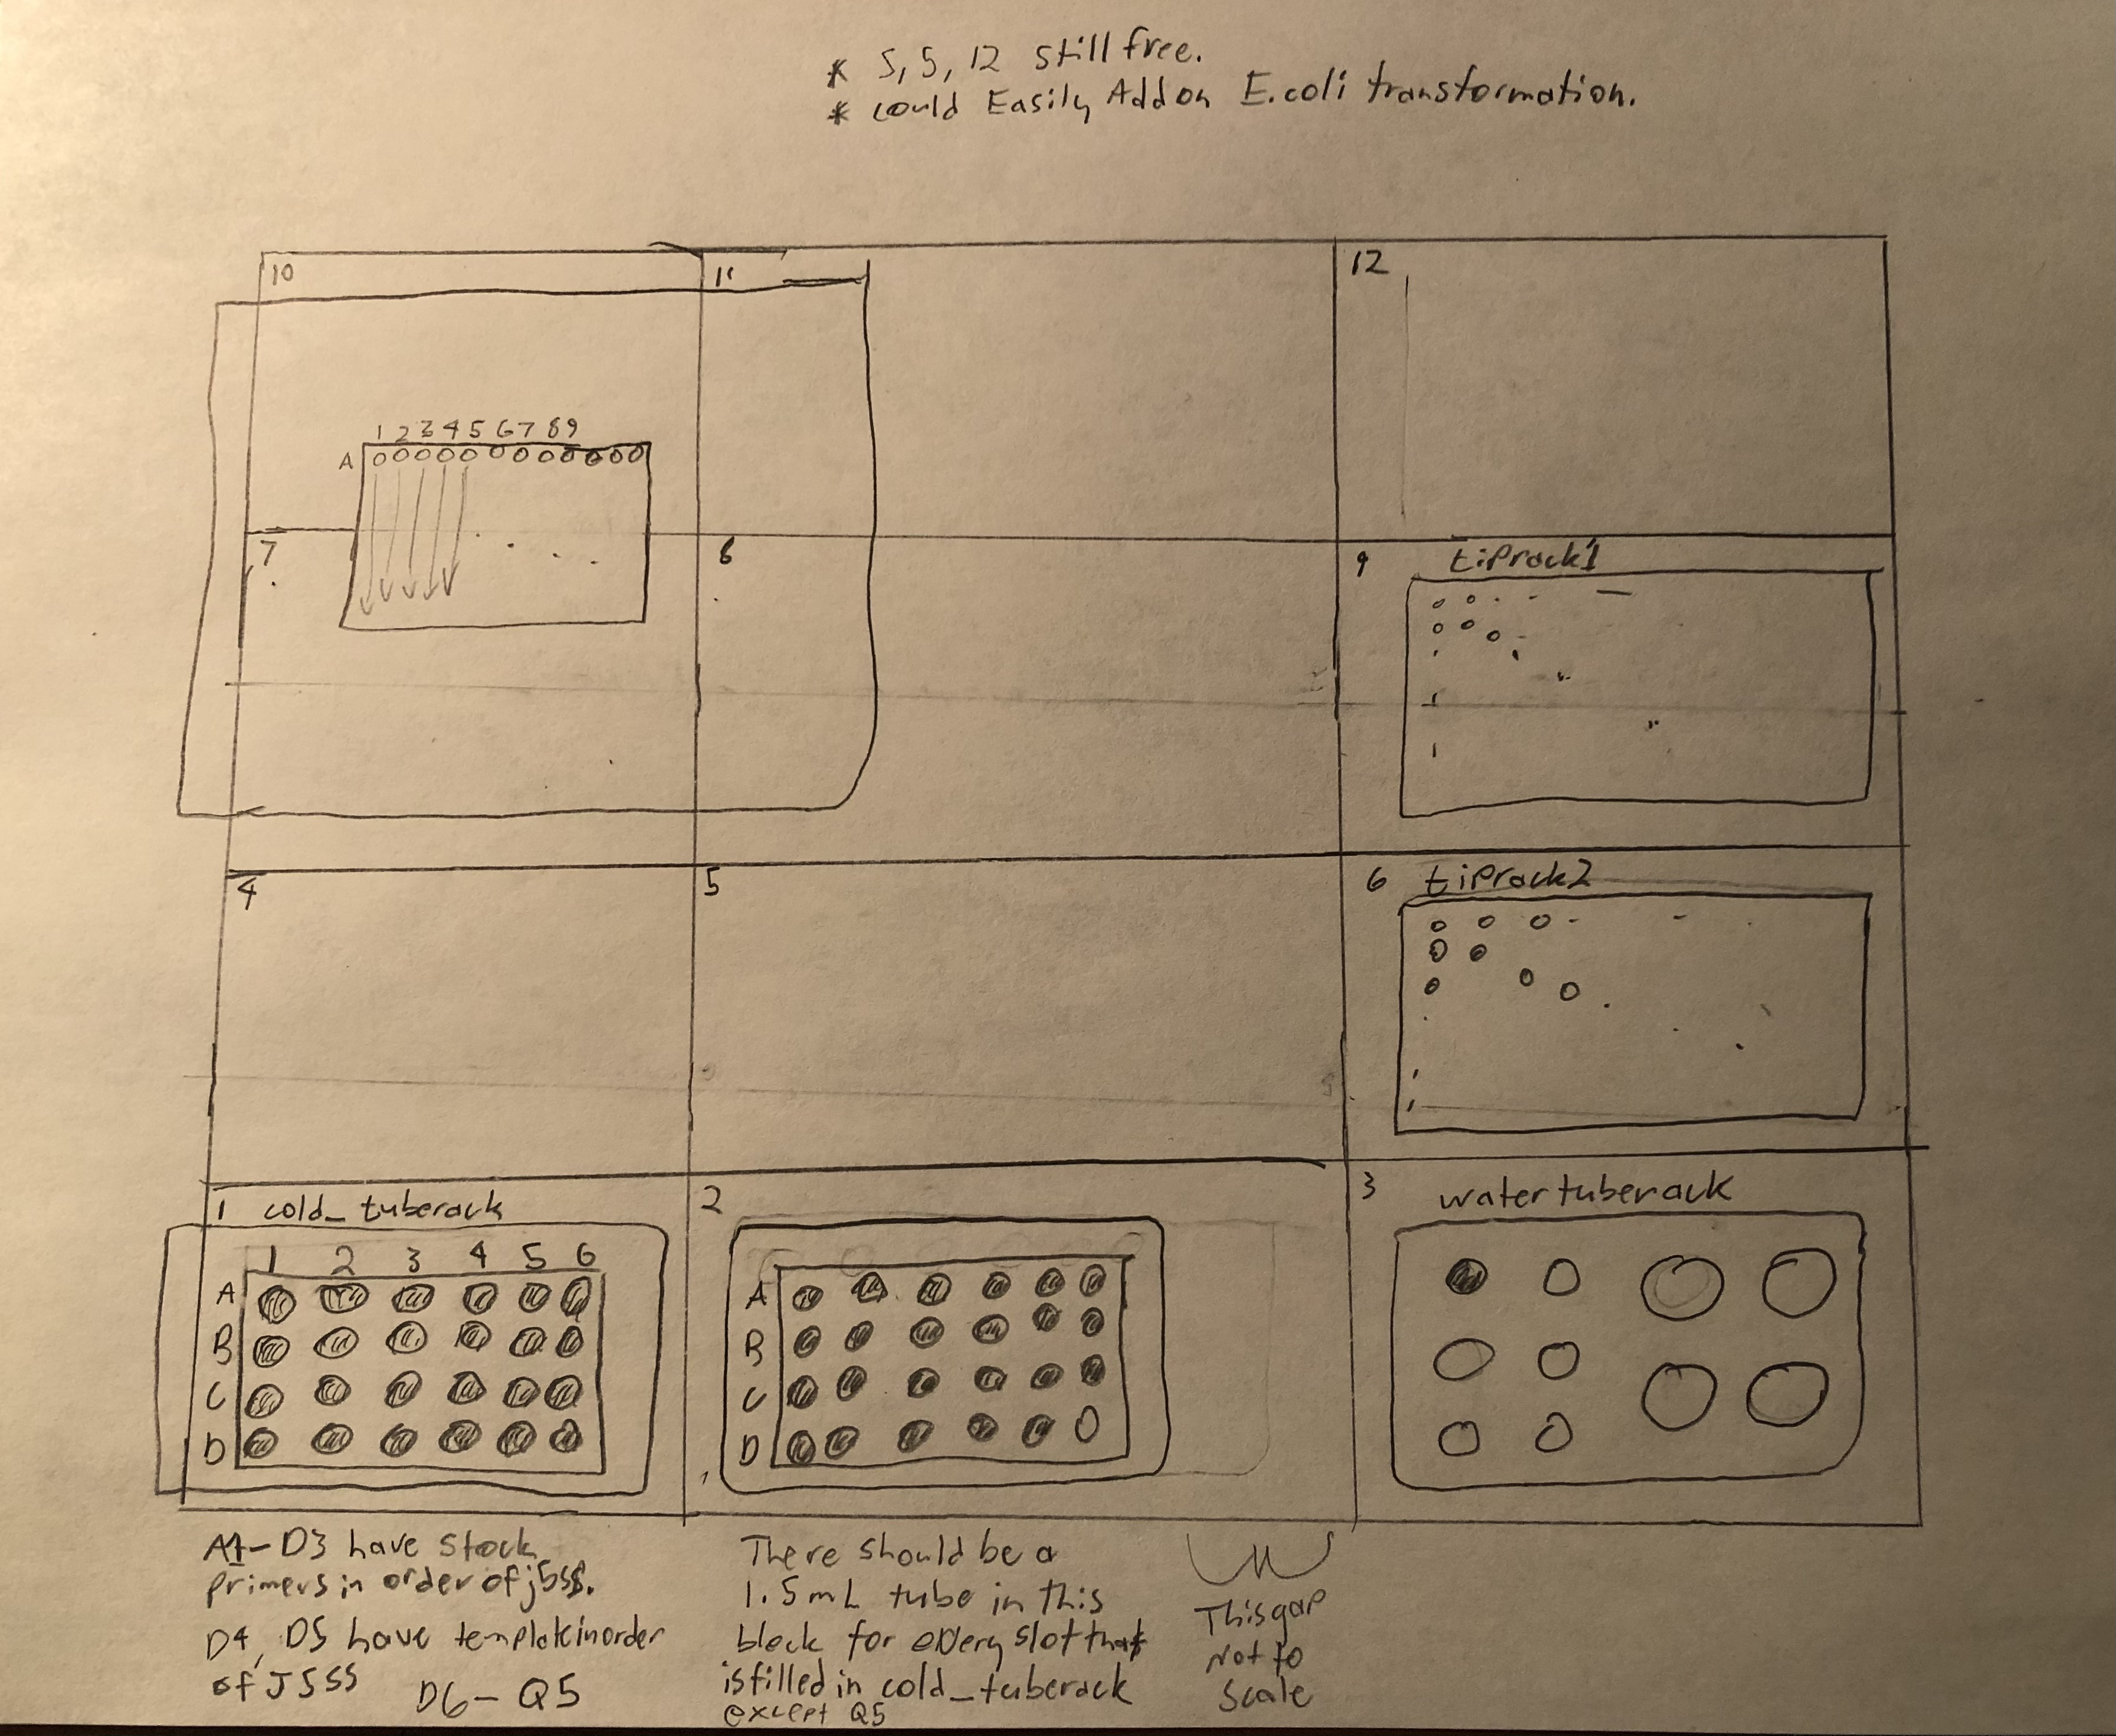

In [80]:
from IPython.display import Image

#change path to location of where you cloned the repo in your computer
personal_repository_path = 'C:/Users/jonbr/Documents/GitHub/opentrons/IVA/AFB_epistasis_muts/'

Image(filename = personal_repository_path + "Diagram.jpg", width=600, height=600)

# Opentrons IVA Script

In [81]:
#First we will import python API (Application Programming Interface) into our script so that we can develop a protol that 
#can be understood by the robot

import sys
!{sys.executable} -m pip install opentrons

#!pip install --upgrade opentrons #for .py files

Protocols are structured around a function called run(protocol). The function has to be name "run" and must take exactly one mandatory argument ("protocol"). function run is a container for the code that defines your protocol.

protocol context has 2 responsibilities: 1)remember, track, and check robot's state 2)expose the functions that make the robot execute actions.

In [82]:
#Metadata is a dictionary of data that is read by the server and returned to the opentrons app. 
#give yourself credit. you are required to specify the 'apiLevel' herefrom opentrons import protocol_api
metadata = {
    'protocolName': 'AFB Epistasis Mutations Protocol',
    'author': 'John Bryant <jbryant2@vt.edu>',
    'description': 'Protocol for performing PCR reactions and Plasmid assembly for TIR1 and AFB mutants',
    'apiLevel': '2.6'
}
print(metadata)




#def run(protocol: protocol_api.ProtocolContext): #for actually running the script in the robot
#will have to indent everything to be defined by the run function

from opentrons import simulate
protocol = simulate.get_protocol_api('2.2')
    
#labware:
tiprack1 = protocol.load_labware('opentrons_96_tiprack_300ul', '9')
tiprack2 = protocol.load_labware('opentrons_96_tiprack_300ul','6')
#tuberack1 = protocol.load_labware('opentrons_24_tuberack_generic_2ml_screwcap','1') #holds stock primers and templates
watertuberack = protocol.load_labware('opentrons_15_tuberack_falcon_15ml_conical','3') #holds molec bio grad H2O
tuberack2 = protocol.load_labware('opentrons_24_tuberack_nest_1.5ml_snapcap','2') # holds dilute primers and templates
    
tc_mod = protocol.load_module('Thermocycler Module')
pcrplate = tc_mod.load_labware('nest_96_wellplate_100ul_pcr_full_skirt')
temp_module = protocol.load_module('temperature module', 1)
cold_tuberack = temp_module.load_labware('opentrons_24_aluminumblock_generic_2ml_screwcap', label='Temperature-Controlled Tubes')
temp_module.set_temperature(4)
print(temp_module.temperature)
tc_mod.open_lid()

#########Some notes:    
#specify the order of stock primers and template in tuberack1 here:
#good place to add the pop-up window
#A1-D3 = stock primers
#D4-D5 = stock templates
#stock tubes and dilution tubes need to be set up in the same order
#as of now Q5 is in 
    
#pipettes
right_pipette = protocol.load_instrument('p300_single','right',tip_racks=[tiprack1])
left_pipette = protocol.load_instrument('p300_single','left',tip_racks=[tiprack2])
    
##################################COMMANDS####################################
    
#add water to template dilution tubes. ***df is the template description dataframe
#Since we are just moving water I will use the same pipette tip to save plastic
left_pipette.pick_up_tip()
for i, row in df.iterrows():
    left_pipette.aspirate(volume = df.loc[i].at['water to add'], location = watertuberack['A1'], rate=2.0) #total vol dilute template - vol stock template to add
    left_pipette.dispense(df.loc[i].at['water to add'], tuberack2[df.loc[i].at['template_well']], rate=2.0)
    
#add water to primer dilution tubes
for i, row in oligos.iterrows():
    left_pipette.aspirate(oligos.loc[i].at['volume of diluted primer']-oligos.loc[i].at['volume of stock primer to add'], watertuberack['A1'], rate=2.0) #need to put 39uL of water into each dilution tube for primers,) #we need to find better way to loop through these commands
    left_pipette.dispense(oligos.loc[i].at['volume of diluted primer']-oligos.loc[i].at['volume of stock primer to add'], tuberack2[oligos.loc[i].at['well']], rate=2.0)
left_pipette.drop_tip()    
    
#add stock templates to dilution tubes
for i, row in df.iterrows():
    right_pipette.pick_up_tip()
    right_pipette.aspirate(df.loc[i].at['amount of template to add'], cold_tuberack[df.loc[i].at['template_well']], rate=2.0) #dilution well corresponds to stock well
    right_pipette.dispense(df.loc[i].at['amount of template to add'], tuberack2[df.loc[i].at['template_well']], rate=2.0) #makes a 12.5ng/uL template
    right_pipette.drop_tip()
    
#add stock primers to dilution tube
for i, row in oligos.iterrows():
    right_pipette.pick_up_tip() #add in an iterrows function
    right_pipette.aspirate(oligos.loc[i].at['volume of stock primer to add'], cold_tuberack[oligos.loc[i].at['well']], rate=2.0)
    right_pipette.dispense(oligos.loc[i].at['volume of stock primer to add'], tuberack2[oligos.loc[i].at['well']], rate=2.0)
    right_pipette.drop_tip()
    
#robot pauses so user can take out stock primers and put in DNPNI
protocol.pause('Take all stock primers and templates out. Add DPNI to A1. Then proceed')
    
#now mix dilute primers, dilute templates, Q5, and water in pcr tube within thermocycler
tc_mod.open_lid()
    
#add water first
for i, row in combinations.iterrows():
        
    right_pipette.pick_up_tip()
    right_pipette.aspirate(combinations.loc[i].at['water to add'], watertuberack['A1'], rate=2.0) #need to write a function to add up all volumes that are being added and figure out how much water to add in automated way
    right_pipette.dispense(combinations.loc[i].at['water to add'], pcrplate[combinations.loc[i].at['pcrwell']], rate=2.0)
    right_pipette.drop_tip()
    
#add 1uL of each primer
for i, row in combinations.iterrows():
        
    for j in filter_col:
        right_pipette.pick_up_tip()
        right_pipette.aspirate(combinations.loc[i].at['amount primer to add to IVA'], tuberack2[combinations.loc[i].at[j]], rate=2.0)
        right_pipette.dispense(combinations.loc[i].at['amount primer to add to IVA'], pcrplate[combinations.loc[i].at['pcrwell']], rate=2.0)
        right_pipette.drop_tip()
    
#add 1uL of each template
for i, row in combinations.iterrows():
        
    for j in temp_col:
        right_pipette.pick_up_tip()
        right_pipette.aspirate(combinations.loc[i].at['amount templates to add'], tuberack2[combinations.loc[i].at[j]], rate=2.0)
        right_pipette.dispense(combinations.loc[i].at['amount primer to add to IVA'], pcrplate[combinations.loc[i].at['pcrwell']], rate=2.0)
        right_pipette.drop_tip()
    
#add Q5 to each reaction
#keep Q5 in tuberack1['D6']                                            
for i, row in combinations.iterrows():
    right_pipette.pick_up_tip()
    right_pipette.aspirate(Q5, cold_tuberack['D6'], rate=2.0)
    right_pipette.aspirate(Q5, pcrplate[combinations.loc[i].at['pcrwell']], rate=2.0)
    right_pipette.drop_tip()
    
#Now run thermocycler to amplify DNA
    
#these parameters can be altered for different pcr reactionsabs
#should automate calculation of the parameters from j5 spreadsheets.
#maybe use the median annealing temperature in the spreadsheet
    
tc_mod.set_lid_temperature(temperature = 105)
tc_mod.close_lid()
tc_mod.set_block_temperature(98, hold_time_seconds=30, block_max_volume=25)
profile = [
    {'temperature': 98, 'hold_time_seconds': 10},
    {'temperature': 68, 'hold_time_seconds': 30},
    {'temperature': 72, 'hold_time_seconds': 60}] #should automate calculation of annealing temp based on spreadsheet
tc_mod.execute_profile(steps=profile, repetitions=34, block_max_volume=25)
tc_mod.set_block_temperature(72, hold_time_minutes=5, block_max_volume=25)
tc_mod.set_block_temperature(4)
tc_mod.open_lid()

#Now add DPNI for digestion
for i, row in combinations.iterrows():
    left_pipette.pick_up_tip()
    left_pipette.aspirate(DPNI, cold_tuberack['A1'], rate=2.0)
    left_pipette.aspirate(DPNI, pcrplate[combinations.loc[i].at['pcrwell']], rate=2.0)
    left_pipette.drop_tip()

tc_mod.close_lid()
tc_mod.set_block_temperature(37, hold_time_minutes=5, block_max_volume=25)
tc_mod.set_block_temperature(4)
tc_mod.deactivate_lid()
tc_mod.open_lid()

print('all done')

C:\Users\jonbr\.opentrons\deck_calibration.json not found. Loading defaults
C:\Users\jonbr\.opentrons\robot_settings.json not found. Loading defaults
Cannot assure a safe gantry position to avoid colliding with the lid of the Thermocycler Module.


{'protocolName': 'AFB Epistasis Mutations Protocol', 'author': 'John Bryant <jbryant2@vt.edu>', 'description': 'Protocol for performing PCR reactions and Plasmid assembly for TIR1 and AFB mutants', 'apiLevel': '2.6'}
4
all done
